In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import opendatasets as od 

In [30]:
dataset_url = "https://www.kaggle.com/datasets/nayanack/shipping"
od.download(dataset_url)
os.chdir("shipping")
os.listdir()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/nayanack/shipping


100%|██████████| 121k/121k [00:00<00:00, 542kB/s]

['shipping.csv']

In [2]:
df_shipping = pd.read_csv("./shipping.csv")
df_shipping.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


In [3]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df_shipping.describe(include="all")

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


Data Normalization for continuous variables

In [5]:
df_shipping["Discount_offered_norm"] = df_shipping["Discount_offered"]/df_shipping["Discount_offered"].max()
df_shipping["Cost_of_the_Product_norm"] = df_shipping["Cost_of_the_Product"]/df_shipping["Cost_of_the_Product"].max()
df_shipping["Weight_in_gms_norm"] = df_shipping["Weight_in_gms"]/df_shipping["Weight_in_gms"].max()

In [6]:
df_shipping.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Discount_offered_norm',
       'Cost_of_the_Product_norm', 'Weight_in_gms_norm'],
      dtype='object')

Exploratory Data Analysis

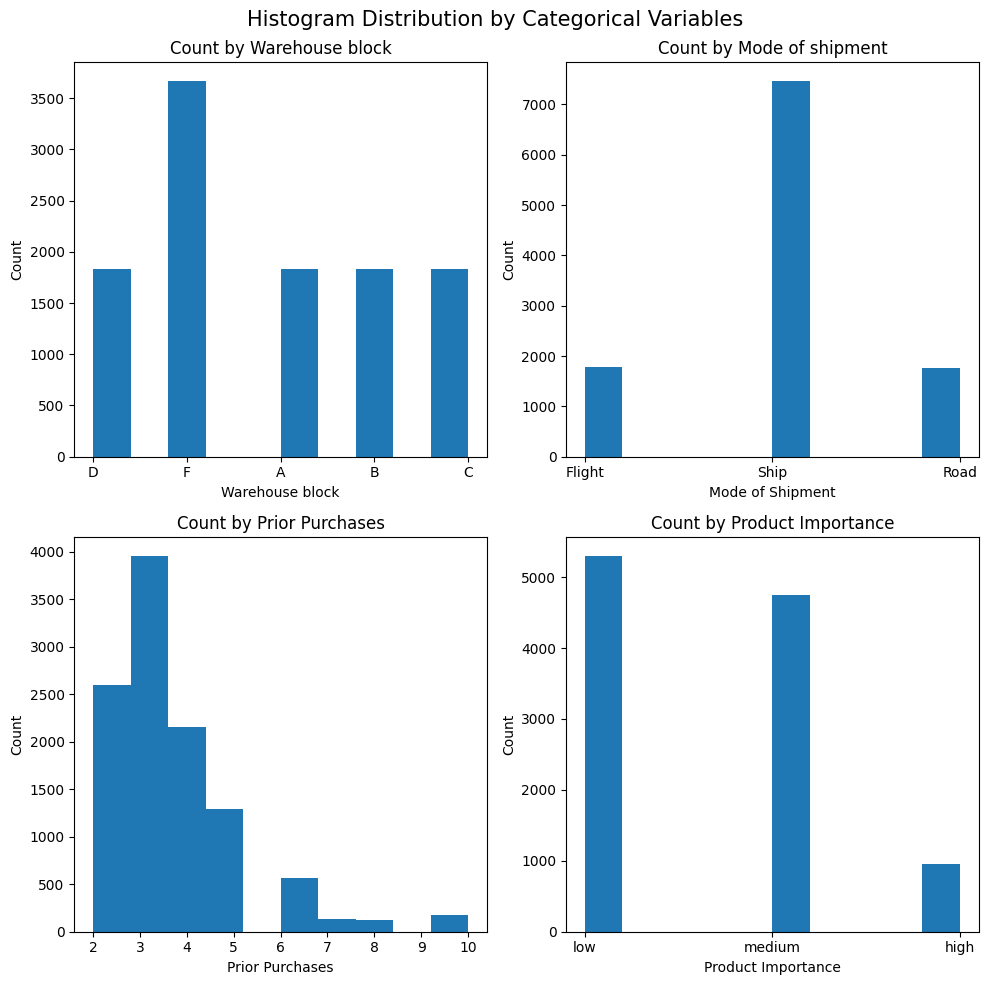

In [8]:
mpl.style.use('default')

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1.hist(df_shipping['Warehouse_block'])
ax1.set_title('Count by Warehouse block')
ax1.set_ylabel('Count')
ax1.set_xlabel('Warehouse block')

ax2 = fig.add_subplot(2,2,2)
ax2.hist(df_shipping['Mode_of_Shipment'])
ax2.set_title('Count by Mode of shipment')
ax2.set_ylabel('Count')
ax2.set_xlabel('Mode of Shipment')

ax3 = fig.add_subplot(2,2,3)
ax3.hist(df_shipping['Prior_purchases'])
ax3.set_title('Count by Prior Purchases')
ax3.set_ylabel('Count')
ax3.set_xlabel('Prior Purchases')

ax4 = fig.add_subplot(2,2,4)
ax4.hist(df_shipping['Product_importance'])
ax4.set_title('Count by Product Importance')
ax4.set_ylabel('Count')
ax4.set_xlabel('Product Importance')

fig.suptitle('Histogram Distribution by Categorical Variables', fontsize=15)

fig.tight_layout()

plt.show()

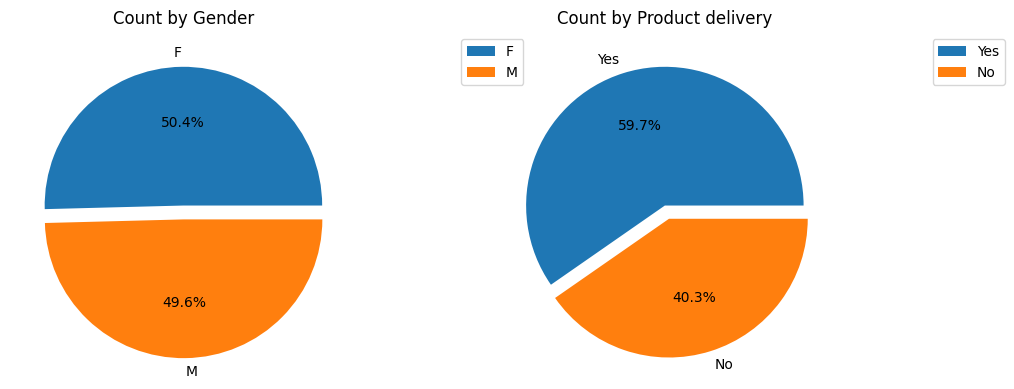

In [9]:
Gender_count = df_shipping.Gender.value_counts()
ProductReached = df_shipping['Reached.on.Time_Y.N'].value_counts()

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
ax1.pie(x = Gender_count, labels=Gender_count.index,autopct='%1.1f%%',explode = [0,0.1])
ax1.set_aspect('equal')
ax1.set_title('Count by Gender')
ax1.legend(bbox_to_anchor=(1, 0, 0.5, 1))

ax2 = fig.add_subplot(1,2,2)
ax2.pie(x = ProductReached, labels=['Yes','No'],autopct='%1.1f%%',explode = [0,0.1])
ax2.set_aspect('equal')
ax2.set_title('Count by Product delivery')
ax2.legend(bbox_to_anchor=(1, 0, 0.5, 1))

fig.tight_layout()

plt.show()

Bins for continuous variables

In [11]:
binsCostProduct = np.linspace(min(df_shipping['Cost_of_the_Product']), max(df_shipping['Cost_of_the_Product']),4)
group_names = ['Low','Medium','High']
df_shipping['CostProductBinned'] = pd.cut(df_shipping['Cost_of_the_Product'],binsCostProduct,labels=group_names,include_lowest=True)

binsDiscountOffered = np.linspace(min(df_shipping['Discount_offered']), max(df_shipping['Discount_offered']),4)
group_names = ['Low','Medium','High']
df_shipping['DiscountOfferedBinned'] = pd.cut(df_shipping['Discount_offered'],binsDiscountOffered,labels=group_names,include_lowest=True)

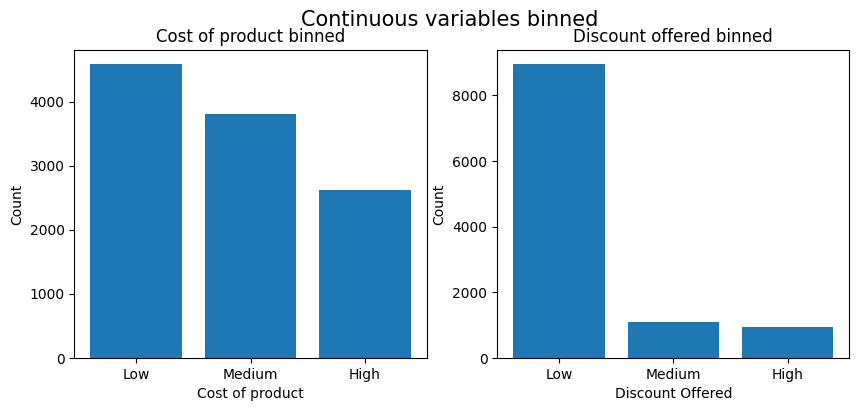

In [13]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
ax1.bar(group_names,df_shipping['CostProductBinned'].value_counts())
ax1.set_ylabel('Count')
ax1.set_xlabel('Cost of product')
ax1.set_title('Cost of product binned')

ax2 = fig.add_subplot(1,2,2)
ax2.bar(group_names,df_shipping['DiscountOfferedBinned'].value_counts())
ax2.set_ylabel('Count')
ax2.set_xlabel('Discount Offered')
ax2.set_title('Discount offered binned')

fig.suptitle('Continuous variables binned', fontsize=15)

plt.show()


In [173]:
df_shipping.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Discount_offered_norm',
       'Cost_of_the_Product_norm', 'Weight_in_gms_norm', 'CostProductBinned',
       'DiscountOfferedBinned', 'WeightBinned'],
      dtype='object')

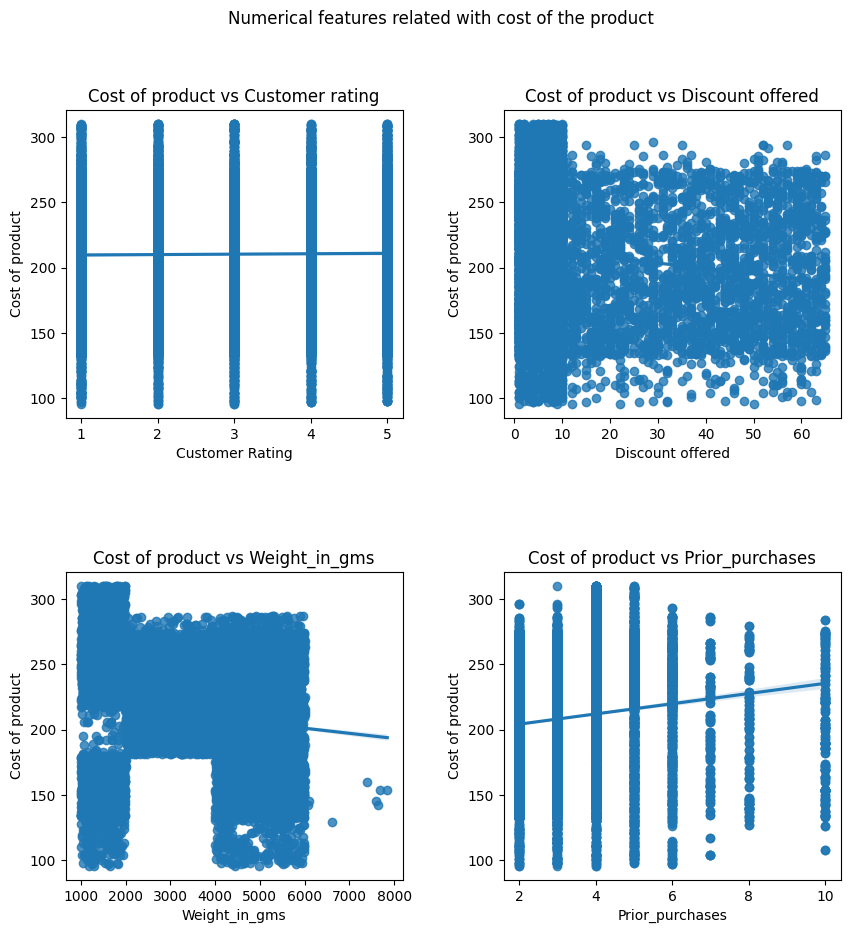

In [44]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.regplot(x='Customer_rating' , y='Cost_of_the_Product' ,data= df_shipping)
ax1.set_title('Cost of product vs Customer rating')
ax1.set_ylabel('Cost of product')
ax1.set_xlabel('Customer Rating')

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.regplot(x='Discount_offered' , y='Cost_of_the_Product' ,data= df_shipping)
ax2.set_title('Cost of product vs Discount offered')
ax2.set_ylabel('Cost of product')
ax2.set_xlabel('Discount offered')

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.regplot(x='Weight_in_gms',y='Cost_of_the_Product',data=df_shipping)
ax3.set_title('Cost of product vs Weight_in_gms')
ax3.set_ylabel('Cost of product')
ax3.set_xlabel('Weight_in_gms')

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.regplot(x='Prior_purchases',y='Cost_of_the_Product', data = df_shipping)
ax4.set_title('Cost of product vs Prior_purchases')
ax4.set_ylabel('Cost of product')
ax4.set_xlabel('Prior_purchases')

fig.suptitle("Numerical features related with cost of the product")

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


In [33]:
for param in ["Customer_rating", "Discount_offered","Weight_in_gms","Prior_purchases"]:
    print(f"Correlation of Cost of product and {param} is ", df_shipping[[param,"Cost_of_the_Product"]].corr())

Correlation of Cost of product and Customer_rating is                       Customer_rating  Cost_of_the_Product
Customer_rating              1.00000              0.00927
Cost_of_the_Product          0.00927              1.00000
Correlation of Cost of product and Discount_offered is                       Discount_offered  Cost_of_the_Product
Discount_offered             1.000000            -0.138312
Cost_of_the_Product         -0.138312             1.000000
Correlation of Cost of product and Weight_in_gms is                       Weight_in_gms  Cost_of_the_Product
Weight_in_gms             1.000000            -0.132604
Cost_of_the_Product      -0.132604             1.000000
Correlation of Cost of product and Prior_purchases is                       Prior_purchases  Cost_of_the_Product
Prior_purchases             1.000000             0.123676
Cost_of_the_Product         0.123676             1.000000


Categorical features related with cost of the product

In [35]:
df_shipping.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Discount_offered_norm',
       'Cost_of_the_Product_norm', 'Weight_in_gms_norm', 'CostProductBinned',
       'DiscountOfferedBinned'],
      dtype='object')

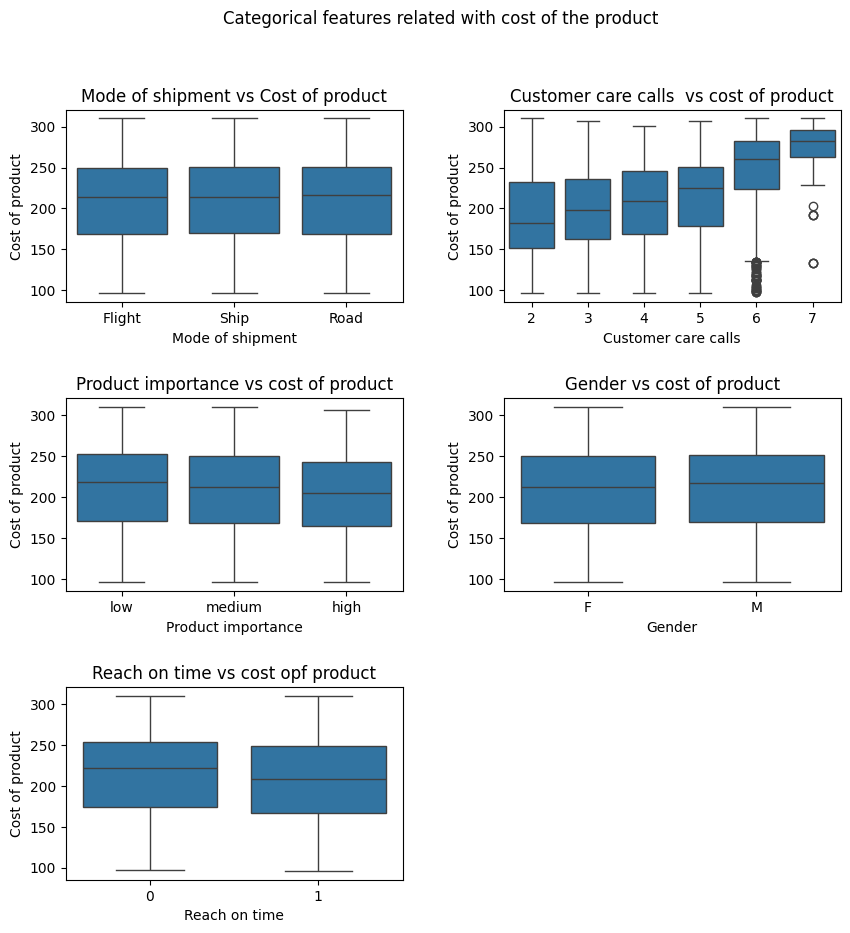

In [43]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,2,1)
ax1 = sns.boxplot(x='Mode_of_Shipment',y='Cost_of_the_Product',data=df_shipping)
ax1.set_title("Mode of shipment vs Cost of product")
ax1.set_ylabel("Cost of product")
ax1.set_xlabel("Mode of shipment")

ax1 = fig.add_subplot(3,2,2)
ax1 = sns.boxplot(x='Customer_care_calls',y='Cost_of_the_Product',data=df_shipping)
ax1.set_title("Customer care calls  vs cost of product")
ax1.set_ylabel("Cost of product")
ax1.set_xlabel("Customer care calls")

ax1 = fig.add_subplot(3,2,3)
ax1 = sns.boxplot(x='Product_importance',y='Cost_of_the_Product',data=df_shipping)
ax1.set_title("Product importance vs cost of product")
ax1.set_ylabel("Cost of product")
ax1.set_xlabel("Product importance")

ax1 = fig.add_subplot(3,2,4)
ax1 = sns.boxplot(x='Gender',y='Cost_of_the_Product',data=df_shipping)
ax1.set_title("Gender vs cost of product")
ax1.set_ylabel("Cost of product")
ax1.set_xlabel("Gender")

ax1 = fig.add_subplot(3,2,5)
ax1 = sns.boxplot(x='Reached.on.Time_Y.N',y='Cost_of_the_Product',data=df_shipping)
ax1.set_title("Reach on time vs cost opf product")
ax1.set_ylabel("Cost of product")
ax1.set_xlabel("Reach on time")

fig.suptitle("Categorical features related with cost of the product")

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()